## Decision Tree Regressor Implementation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
##California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [4]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
df=pd.DataFrame(california_df.data,columns=california_df.feature_names)
df['Target']=california_df.target

In [7]:
df.shape

(20640, 9)

In [8]:
## Taking Sample Data
df=df.sample(frac=0.25)

In [9]:
df.shape

(5160, 9)

In [10]:
#independent features
X=df.iloc[:,:-1]
#dependent features
y=df.iloc[:,-1]

In [12]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10722,4.1944,8.0,2.909091,0.818182,26.0,2.363636,33.63,-117.80
20374,5.2200,18.0,5.967583,1.037328,2571.0,2.525540,34.16,-118.84
3565,4.9676,22.0,5.598291,1.107692,1746.0,2.984615,34.23,-118.57
19255,2.6384,16.0,4.527304,1.034130,1693.0,2.889078,38.46,-122.75
16690,2.6974,31.0,4.614907,1.071429,823.0,2.555901,35.12,-120.61


In [13]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [15]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
y_pred=regressor.predict(X_test)

In [18]:
y_pred

array([3.019  , 5.     , 5.00001, ..., 2.586  , 1.946  , 2.092  ])

In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [20]:
score

0.4658914361686767

In [21]:
## Hyperparameter Tunning
parameter={
 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
  'max_features':['auto', 'sqrt', 'log2']

}
regressor=DecisionTreeRegressor()

In [22]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,cv=2,scoring='neg_mean_squared_error')

In [23]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'best'}

In [26]:
regressor=DecisionTreeRegressor(criterion='absolute_error',max_depth=7,max_features='auto',splitter='best')

In [28]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_features='auto')

In [29]:
%matplotlib inline

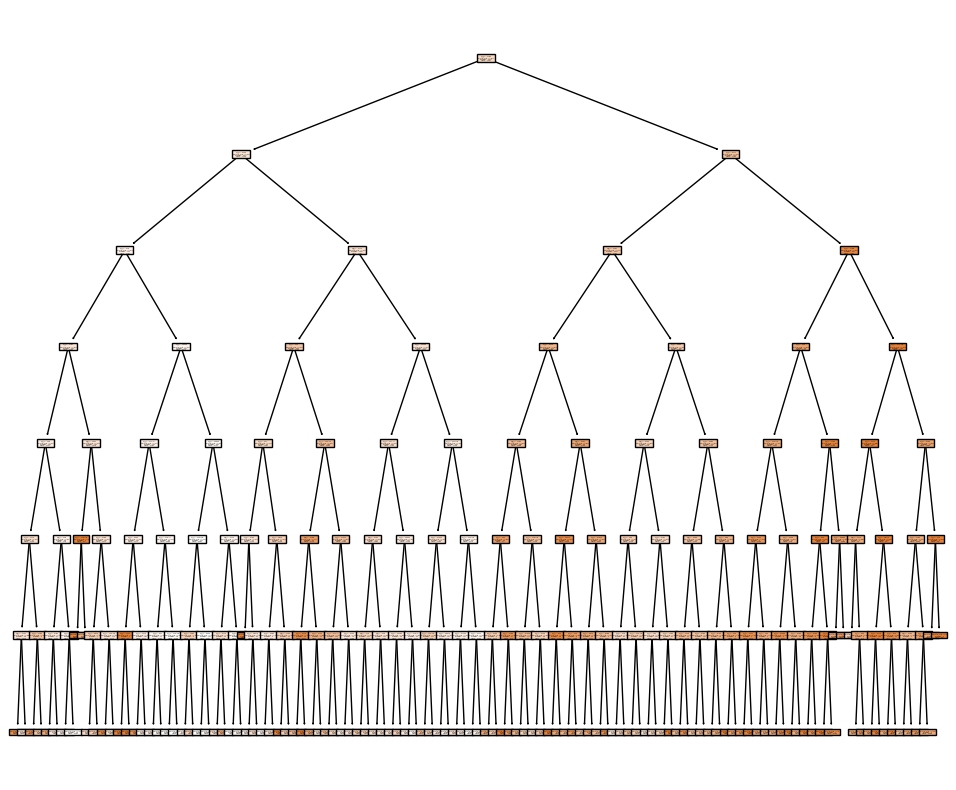

In [31]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [32]:
y_pred=regressorcv.predict(X_test)

In [33]:
y_pred

array([2.37807908, 3.91545484, 3.91545484, ..., 2.0392266 , 1.95147278,
       3.441402  ])

In [34]:
r2_score(y_pred,y_test)

0.5043712100468658